
# Exercício 06
## Planejamento de Experimentos
### Alunos:

- João Marco Oliveira Barros - 10351992
- Leandro Giusti Mugnaini - 10260351
- Matheus Borges Kamla - 10277015

---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

## Funções novas utilizadas no exercício

- [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix)






---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Diabetes:** [sklearn.datasets.load_diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. 

No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

Dada a introdução acima, já definimos que o tipo do problema é classificação. Defina quais os atributos você utilizará, e a medida de avaliação você acha adequada e explique o porquê dessas escolhas. Você também deve fazer nessa questão os pré-processamentos que achar necessário.

Lembre-se que o objetivo da classificação é fazer predições para dados não vistos, ou seja, quando o algoritmo for colocado em produção ele classificará corretamente amostras que não foram usadas durante o treinamento/validação
.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from matplotlib import pyplot as plt
from sklearn.datasets import load_diabetes

Lendo e padronizando os dados:

In [ ]:
diabetes = load_diabetes()
dados = diabetes.data
alvo = diabetes.target

Transformando o dataset em um DataFrame:

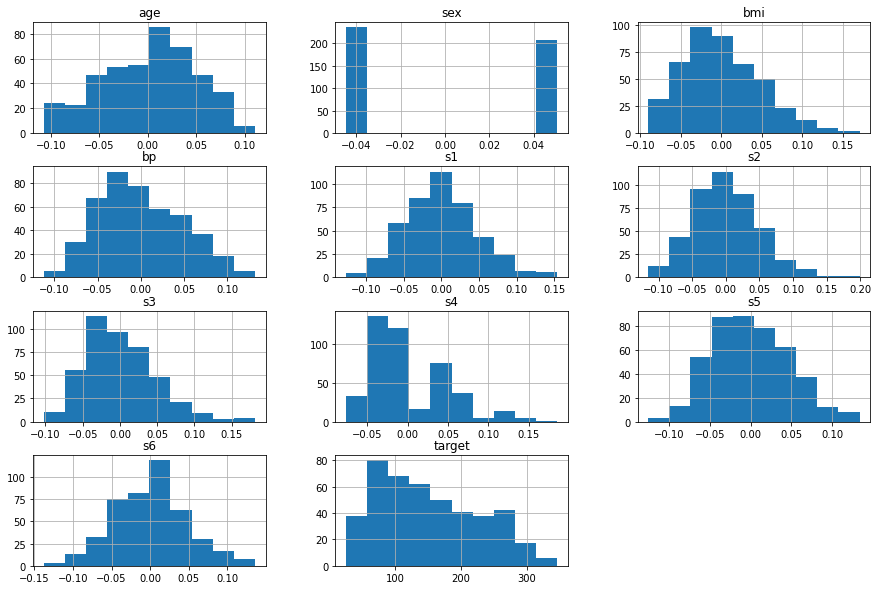

In [ ]:
df = pd.DataFrame(data=np.c_[dados, alvo], columns= diabetes['feature_names'] + ['target'])

plt.rcParams['figure.figsize'] = [15, 10]
_ = df.hist()

Vamos agora descrever o que cada uma das features e o target representam, utilizando como base a [página do scikit-learn](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) que contém o dataset. Assim espera-se obter uma melhor compreensão sobre o problema que estamos trabalhando:

Features:



*   "age": idade em anos
*   "sex": sexo da pessoa
*   "bmi": índice de massa corporal
*   "bp": pressão sanguínea média
*   "s1": células-T (um tipo de célula sanguínea branca)
*   "s2": ldl (low density lipoproteins - transporta colesterol do fígado às células)
*   "s3": hdl (high density lipoproteins - retira o excesso de colesterol das células e leva de volta ao fígado)
*   "s4": tch - hormômio estimulador da tireóide
*   "s5": ltg - lamotrigina
*   "s6": glu - nível de açúcar no sangue


Target:

*  Medida quantitativa da progressão da doença um ano após o diagnóstico.



Agora precisamos transformar o dataset em um dataset binário. Para fazer essa mudança, vamos analisar a média dos valores da variável alvo. Dados que possuem valores de target abaixo da média serão considerados como doença não severa. Já dados que possuem valores acima da média serão considerados como doença severa. 

In [ ]:
df['target'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

O valor de "mean" nos dá a informação da média, ou seja, a média do conjunto de dados é igual a 152.13.


0.0    247
1.0    195
Name: target, dtype: int64

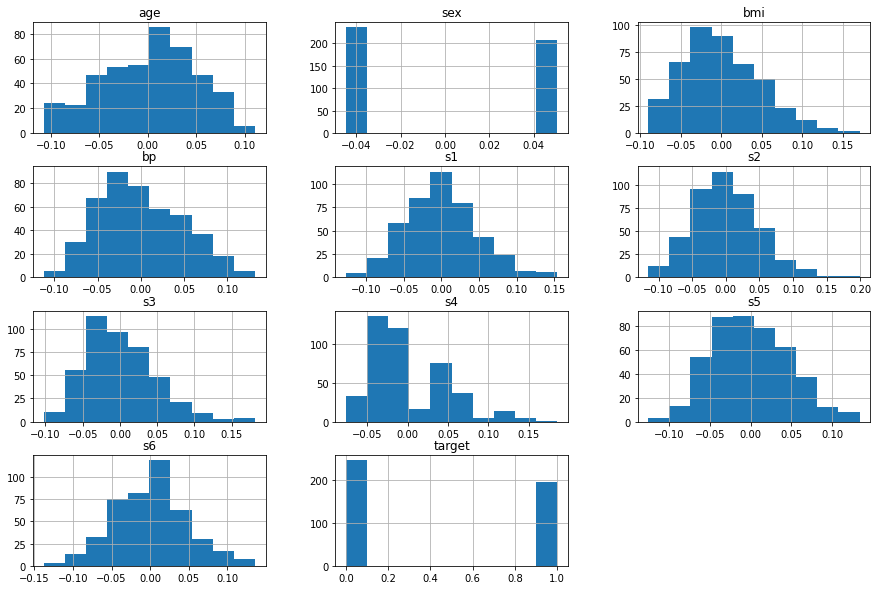

In [ ]:
#Classe doença não severa
df['target'].values[df['target'].values < 152.13] = 0
#Classe doença severa
df['target'].values[df['target'].values >= 152.13] = 1

_ = df.hist()
df['target'].value_counts()

[texto do link](https://)Vamos agora encontrar a correlação entre os atributos utilizando a matriz de correlação com o método de Pearson, para definir as features mais importantes para o problema de classificação. 



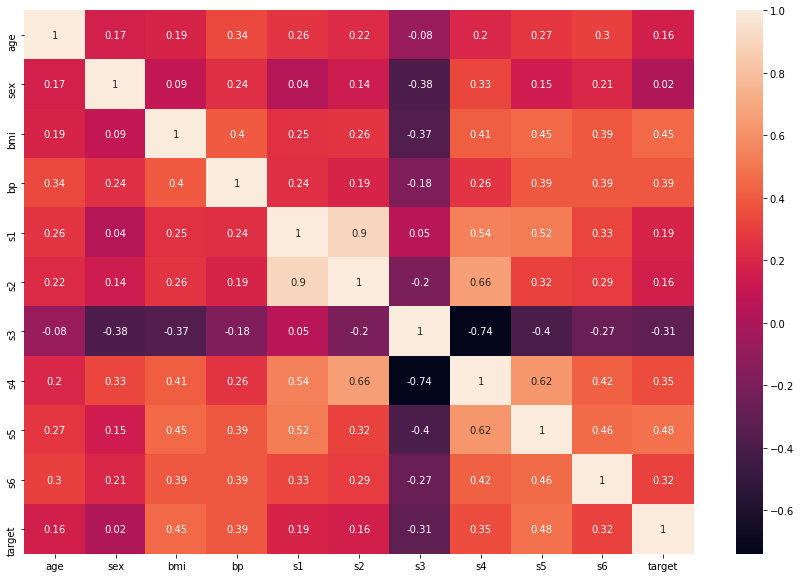

In [ ]:
correlation_matrix = df.corr(method="pearson").round(2)
sns.heatmap(data=correlation_matrix, annot=True)



Vamos definir um limiar na correlação para definirmos quais atributos são relevantes. No caso estamos analisando a correlação das features com o target. O limiar escolhido foi de $|0.3|$, ou seja, atributos com correlação menor do que $|0.3|$ serão retirados do modelo de classificação. Assim, manteremos os seguintes atributos:

*   bmi
*   bp
* s3
* s4
* s5
* s6




In [ ]:
df_new = df.drop(['age', 'sex', 's1', 's2'], axis=1)
df_new


,bmi,bp,s3,s4,s5,s6,target
0,0.061696,0.021872,-0.043401,-0.002592,0.019908,-0.017646,0.0
1,-0.051474,-0.026328,0.074412,-0.039493,-0.068330,-0.092204,0.0
2,0.044451,-0.005671,-0.032356,-0.002592,0.002864,-0.025930,0.0
3,-0.011595,-0.036656,-0.036038,0.034309,0.022692,-0.009362,1.0
4,-0.036385,0.021872,0.008142,-0.002592,-0.031991,-0.046641,0.0
...,...,...,...,...,...,...,...
437,0.019662,0.059744,-0.028674,-0.002592,0.031193,0.007207,1.0
438,-0.015906,-0.067642,-0.028674,0.034309,-0.018118,0.044485,0.0
439,-0.015906,0.017282,-0.024993,-0.011080,-0.046879,0.015491,0.0
440,0.039062,0.001215,-0.028674,0.026560,0.044528,-0.025930,1.0


Verificou-se no [github do dataset](https://github.com/scikit-learn/scikit-learn/blob/0fb307bf3/sklearn/datasets/_base.py#L751) e no site do [scikit-learn](https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset) que cada uma das 10 features presentes no dataset foram centradas na média e escaladas pelos respectivos desvios-padrões multiplicados pelo número de amostras (ou seja, a soma dos elementos de cada uma das colunas é 1). 

Assim, não será necessário normalizar os dados para melhorar a execução dos classificadores e podemos ir para a próxima questão. 



---

### Questão 02.
Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...), ou da chamada dimensão VC (Vapnik-Chervonenkis) do classificador. A dimensão VC é um tópico mais avançado e faz parte da chamada teoria do aprendizado estatístico, ela é citada aqui apenas como curiosidade não é esperado que saibem sobre isso.

Execute a função *classificacao* definida no notebook com a medida de desempenho que você definiu. Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao(data, columns, target, score=balanced_accuracy_score, score_name='acurácia', 
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    
    #Inicializa estruturas para matrizes de confusão 
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }

    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    cv = KFold(n_splits=folds, shuffle=True)
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
        for train_index, test_index in cv.split(data):
            
            # separa conjunto de treino e de teste
            x_train, y_train = data.iloc[train_index, columns], data.iloc[train_index, target]
            x_test, y_test = data.iloc[test_index, columns], data.iloc[test_index, target]
            
            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores predito pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            results[c_name].append( score(y_test, y_pred) )
            confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)        
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

Vamos utilizar como métrica a acurácia. Utilizando o que foi discutido em aula e analisando um artigo bastante popular do [medium](https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b) que trata sobre quando usar e quando não usar uma medida de desempenho, a acurácia é uma boa medida de desempenho para se usar quando as classes da variável alvo são aproximadamente balanceadas. 

Como temos 55.88% dos dados pertencendo a classe "doença não severa" e 44.12% dos dados pertencendo a classe "doença severa", podemos considerar que a variável alvo está com um bom balanceio. A medida de desempenho de acurácia é dada por:

$$acurácia = \frac{TP+TN}{TP+FP+FN+TN}$$

Onde:
*  TP = True positive
*  TN = True negative
*  FP = False positive
*  FN = False negative


Para garantir no entanto que teremos uma boa acurácia, vamos balancear as classes no conjunto de treinamento utilizando a técnica de undersampling. 

In [ ]:
def undersample(inputs, targets):
  class_dist = targets.value_counts()
  num_nao_severa = class_dist[0]
  num_severa = class_dist[1]

  dados = pd.concat([inputs,targets],axis=1)
  nao_severa = dados[dados['target'] == 0]
  nao_severa_undersampled = nao_severa.sample(n=num_severa,replace=False)
  

  severa = dados[dados['target'] == 1]

  dados_undersampled = pd.concat([severa, nao_severa_undersampled],axis=0)

  undersampled_inputs = dados_undersampled[dados_undersampled.columns[0:-1]]

  undersampled_targets =  dados_undersampled[dados_undersampled.columns[dados_undersampled.columns.size - 1]]
    
  return undersampled_inputs, undersampled_targets

In [ ]:
inputs = df_new[['bmi', 'bp', 's3', 's4', 's5', 's6']]
target = df_new['target']
undersampled_inputs, undersampled_targets = undersample(inputs, target)

undersampled_inputs['target'] = undersampled_targets
df_classificar=undersampled_inputs
df_classificar['target'].value_counts()

0.0    195
1.0    195
Name: target, dtype: int64

Vamos agora calcular o desempenho de diferentes classificadores, utilizando o procedimento de amostragem K-Fold Cross-Validation com K=5. 

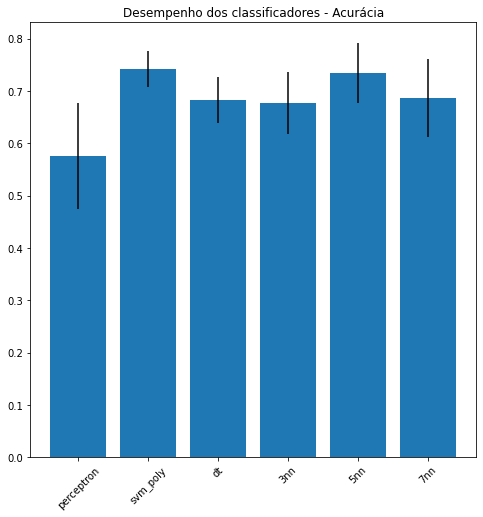

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=3900, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=39,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
classificacao(df_classificar, columns=[0,1,2,3,4,5], target=6, score=balanced_accuracy_score, score_name='Acurácia', 
              folds=5, plot=True)

Como podemos ver pelo gráfico de barras gerado pela função "classificacao", os classificadores que apresentaram melhor acurácia foram KNN para k=5 e Support Vector Machine polinomial.

Como a métrica da acurácia de ambos os modelos é parecida, chegamos a conclusão que o classificador que utiliza o KNN com k=5 possuirá uma melhor generalização pois se trata de um modelo com uma menor complexidade, tanto para treinamento quanto para predição, como pode ser conferido nos sites: [site1](https://www.thekerneltrip.com/machine/learning/computational-complexity-learning-algorithms/) e [site2](https://towardsdatascience.com/k-nearest-neighbors-computational-complexity-502d2c440d5). 



---

### Questão 03.

Utilizar os 3 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;
- Boostrap (1000 amostras de boostrap).

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Para o 10-fold Cross Validation e o leave-one-out, você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.
  * Já para o boostrap, você vai precisar implementar a função classificação modificada `classificacao_bootstrap`. A seção de interesse que vocês precisarão modificar está destacada na função. No cálculo do bootstrap utilize 80% do dataset para treino e 20% para teste.

Essas execuções podem demorar um pouco, então tenham paciência.

**No material complementar há exemplos de como fazer o bootstrap**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error
from numpy import mean, std
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt


def classificacao_bootstrap(data, columns, target, score=balanced_accuracy_score, no_bs=1000, p_teste=0.2, score_name='acurácia', plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    score:      Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    no_bs:      Número de repetições do bootstrap
    p_teste:    Porcentagem para teste da amostra do bootstrap
    score_name: String. Uma string com o nome da medida de desempenho    
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 6 modelos (perceptron, 
    SVM com kernel polinomial de grau 3, Árvore de decisão, 3NN, 5NN, e 7NN)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, medidas de desempenho e matriz de confusão
    """
    import numpy as np
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    svm_n = SVC(C=10*len(data), kernel='poly', degree=3, gamma=1, coef0=1, cache_size=500, max_iter=1e6)
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data)*0.1))
    _3nn = KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto')
    _5nn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto')
    _7nn = KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
    
    clfs = [prcp, svm_n, dt, _3nn, _5nn, _7nn]
    clfs_names = ['perceptron', 'svm_poly', 'dt', '3nn', '5nn', '7nn']
    confusion_matrices = {
        'perceptron':np.array([[0,0],[0,0]]),
        'svm_poly':np.array([[0,0],[0,0]]),
        'dt':np.array([[0,0],[0,0]]),
        '3nn':np.array([[0,0],[0,0]]),
        '5nn':np.array([[0,0],[0,0]]),
        '7nn':np.array([[0,0],[0,0]])
    }
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'svm_poly':[], 'dt':[], '3nn':[], '5nn':[], '7nn':[]}
    for c, c_name in zip(clfs, clfs_names):
      for i in range(0, no_bs):
        ################# IMPLEMENTE ABAIXO O BOOTSTRAP #######################
        #    Sua implementação deve fazer o append no vetor results da mesma 
        #    forma que a implementação original faz.
        #    Dentro desse loop:
        #     c: variável-objeto que representa o classificador
        #     c_name: Nome do classificador
        #     results: vetor de resultado
        #######################################################################
        
        no_exemplos = data.shape[0]
        amostra = data.sample(n = no_exemplos, replace=True)

        X = amostra.iloc[:, columns]
        y = amostra.iloc[:, -1]
        # separa conjunto de treino e de teste

        X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=p_teste)
        ss = StandardScaler()
        X_train = ss.fit_transform(X_train)
        X_test = ss.transform(X_test)
        
        # faz o treino do modelo
        clf = c.fit(X=X_train, y=y_train)
        
        # valores predito pelo classificador
        y_pred = clf.predict(X_test)
        # rótulos verdadeiros convertidos para array
        y_test = np.array(y_test)
        
        # realiza predição no conjunto de teste e salva o resultado
        results[c_name].append( score(y_test, y_pred) )
        confusion_matrices[c_name] += confusion_matrix(y_test, y_pred)


        #######################################################################
        
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs, 'confusion_matrices': confusion_matrices}

Primeiramente vamos analisar os resultados com o  primeiro procedimento de amostragem, utilizando **10-fold Cross Validation**. 

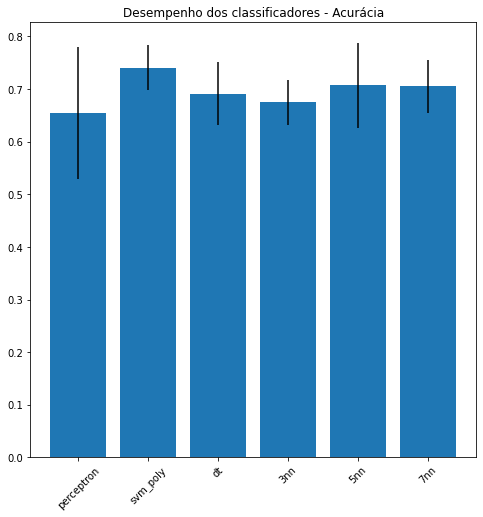

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=3900, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=39,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
#Primeiro procedimento de amostragem, utilizando 10-fold Cross Validation
classificacao(df_classificar, columns=[0,1,2,3,4,5], target=6, score=balanced_accuracy_score, score_name='Acurácia', 
              folds=10, plot=True)

Como pode ser conferido pelo gráfico de barras, utilizando 10-fold Cross Validation os modelos que melhor performaram foram KNN para k=5 e SVM Polinomial. Ao utilizar um  K-fold Cross Validation, os dados são divididos uniformemente em K splits. No nosso caso como temos 390 exemplos de treinamento, cada split terá 39 exemplos.  

Vamos agora testar o modelo utilizando o **LeaveOneOut Cross Validation**, que consiste em utilizar um número de folds igual ao número de dados (ou seja, K=n). 

390


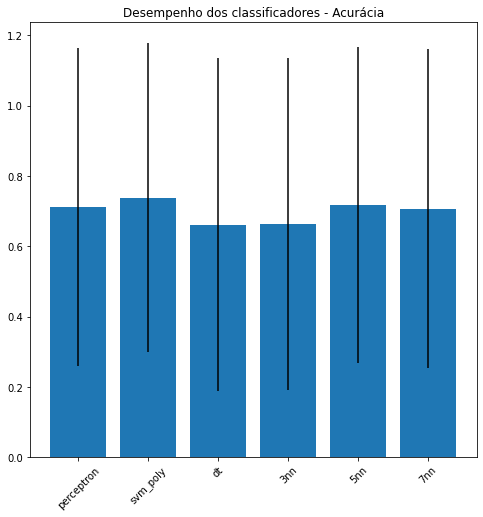

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=3900, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=39,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
#O modelo LeaveOneOut é um caso específico do K-fold, com k igual ao número
#total de dados N. Nesta abordagem são realizados N cálculos de erro, um para
#cada dado
n_fold = df_classificar['target'].size
print(n_fold)
classificacao(df_classificar, columns=[0,1,2,3,4,5], target=6, score=balanced_accuracy_score, score_name='Acurácia', 
              folds=n_fold, plot=True)

Os classificadores SVM polinomial e KNN para K=5 também tiveram bons desempenhos. Note que a variância nesse caso, como esperado, foi bem elevada. 

Vamos agora analisar o método de amostragem **Bootstrap**, com 1000 amostras. 

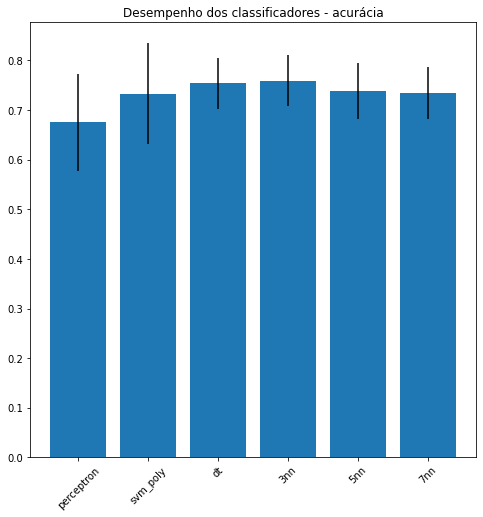

{'clfs': [Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
             fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
             penalty=None, random_state=0, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False),
  SVC(C=3900, break_ties=False, cache_size=500, class_weight=None, coef0=1,
      decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
      max_iter=1000000.0, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=39,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
classificacao_bootstrap(data=df_classificar, columns=[0,1,2,3,4,5], target=6, score=balanced_accuracy_score, no_bs=1000, p_teste=0.2, score_name='acurácia', plot=True)

Como pode ser conferido pelo histograma, os classificadores com os melhores desempenhos foram Decision Tree e KNN para k=3. 


Em relação a **variância**, o procedimento de amostragem bootstrap apresentou a menor variância, seguido do K-fold Cross Validation (para k=10) e do Leave-one-out Cross Validation, que apresentou uma variância bastante elevada. 



---

### Questão 04.

Utilizando o 10-fold cross validation, calcule as medidas de avaliação baseadas na matriz de confusão (TFP, TFN, TVN, TVP). Como em meio a tantas medidas de avaliação, comparar os classificadores? Como escolher o melhor?

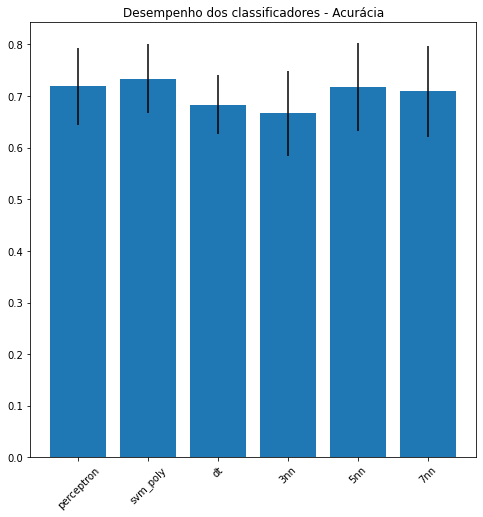

In [ ]:
#Utilizando 10-fold Cross Validation
output = classificacao(df_classificar, columns=[0,1,2,3,4,5], target=6, score=balanced_accuracy_score, score_name='Acurácia', 
              folds=10, plot=True)

In [ ]:
out = output['confusion_matrices'].items()
df = pd.DataFrame.from_dict(out)
df

,0,1
0,perceptron,"[[130, 65], [42, 153]]"
1,svm_poly,"[[149, 46], [58, 137]]"
2,dt,"[[144, 51], [68, 127]]"
3,3nn,"[[134, 61], [68, 127]]"
4,5nn,"[[141, 54], [56, 139]]"
5,7nn,"[[136, 59], [54, 141]]"


As medidas de avaliação são definidas por:

* Recall 

$$Recall = \frac{TP}{TP+FN}$$

* Precision 

$$Precision = \frac{TN}{TN+FP}$$


* Acurácia

$$Acurácia = \frac{TP+TN}{TP+TN+FP+FN}$$

* F1-Score

$$F1Score = \frac{2}{\frac{1}{prec}+\frac{1}{recall}}$$

In [ ]:
#Listas Auxiliares
rec = []
prec = []
acc = []
f_1 = []

In [ ]:
for i in range(df[0].size):
  array_aux = df.loc[i, 1]
  TP = array_aux[0,0]
  FN = array_aux[0,1]
  FP = array_aux[1,0]
  TN = array_aux[1,1]

  recall = TP/(TP+FN)
  precision = TN/(TN+FP)
  accuracy = (TP+TN)/(TP+FN+FP+TN)
  f1 = 2/(1/precision + 1/recall)

  print("Recall do classificador", df.loc[i,0], "é: ", recall)
  print("Precisão do classificador", df.loc[i,0], "é: ", precision)
  print("Acurácia do classificador", df.loc[i,0], "é: ", accuracy)
  print("F1-Score do classificador", df.loc[i,0], "é: ", f1)
  print("\n\n")

  rec.append(recall)
  prec.append(precision)
  acc.append(accuracy)
  f_1.append(f1)


Recall do classificador perceptron é:  0.6666666666666666
Precisão do classificador perceptron é:  0.7846153846153846
Acurácia do classificador perceptron é:  0.7256410256410256
F1-Score do classificador perceptron é:  0.7208480565371025



Recall do classificador svm_poly é:  0.764102564102564
Precisão do classificador svm_poly é:  0.7025641025641025
Acurácia do classificador svm_poly é:  0.7333333333333333
F1-Score do classificador svm_poly é:  0.7320423166577011



Recall do classificador dt é:  0.7384615384615385
Precisão do classificador dt é:  0.6512820512820513
Acurácia do classificador dt é:  0.6948717948717948
F1-Score do classificador dt é:  0.6921373829122908



Recall do classificador 3nn é:  0.6871794871794872
Precisão do classificador 3nn é:  0.6512820512820513
Acurácia do classificador 3nn é:  0.6692307692307692
F1-Score do classificador 3nn é:  0.6687493859907653



Recall do classificador 5nn é:  0.7230769230769231
Precisão do classificador 5nn é:  0.7128205128205128
A

Como pode ser conferido pelos resultados acima, vários modelos apresentaram diferentes desempenhos. Como não há um classificador com desempenho claramente superior aos outros, vamos escolher o que apresentar a menor média e desvio padrão das diferentes medidas de desempenho. 


In [ ]:
#Lista auxiliar para salvar os valores de cada classificador
aux=[]
#Salvando os valores das medidas de desempenho na lista auxiliar
for i in range(0,6):
  aux.append((rec[i],prec[i],acc[i],f_1[i]))

#Transformação do lista auxiliar em um array para podermos calcular as medidas
array_aux = np.array(aux)

#Cálculo das médias e desvios padrões
media = np.mean(array_aux, axis=1)
std = np.std(array_aux, axis=1)

print(media)
print("\n")
print(std)

[0.72444278 0.73301058 0.69418819 0.66911042 0.71793956 0.71019856]


[0.04175278 0.02176431 0.03084534 0.01269337 0.00362622 0.00906603]


In [ ]:
#Calculando os valores de média +- desvio padrão
media_std_mais = media+std
media_std_menos = media-std

print(media_std_mais)
print(media_std_menos)

[0.76619557 0.75477489 0.72503353 0.6818038  0.72156578 0.71926458]
[0.68269    0.71124627 0.66334285 0.65641705 0.71431334 0.70113253]


Como podemos ver, os classificadores SVM_poly e KNN para k=5 apresentaram os melhores desempenhos. Como o classificador SVM polinomial apresentou um maior valor de média e um desvio padrão satisfatório, escolheremos ele como sendo o melhor classificador para esse exercício. 

Vale ressaltar que não existe um melhor classificador universal para todas as situações. O desempenho do classificador dependerá de uma série de fatores, como o conjunto de dados, o procedimento de amostragem, parâmetros e hiperparâmetros dos classificadores, etc. 

O ideal é sempre antes de começar um projeto, realizar uma análise parecida com a que foi feita nesse projeto, com uma amostra dos dados (caso o dataset seja muito grande), assim podemos obter um norte sobre quais caminhos seguir e quais decisões de projeto adotar. 
